<a href="https://colab.research.google.com/github/LeoRosaGarcia/proyecto-data-science-coderhouse/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primera entrega del proyecto final**

---

**Tema**

Deteccion de tabaquismo

---

**Integrantes**


*   Pablo Perera
*   Leonardo Rosa
*   Christian Aldana
*   Eduardo Gonzalez




# **Indicación de la fuente del dataset y los criterios de selección (Data Acquisition)**

* Dataset https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

* Criterios de seleccion: 

# **Variables**

---

*   ID : Indice
*   gender : Genero (M/F)
*   age : Edad, categorica (rangos de 5 años)
*   height(cm) : Altura
*   weight(kg) : Peso
*   waist(cm) : Diametro de circunferencia del abdomen
*   eyesight(left) : Vision izquierda
*   eyesight(right) : Vision derecha
*   hearing(left) : Audicion izquierda
*   hearing(right) : Audicion derecha
*   systolic : Presion arterial
*   relaxation : Pulso
*   fasting blood sugar : Azucar en sangre (glicemia) 
*   Cholesterol : Colesterol
*   triglyceride : Trigliceridos
*   HDL : Tipo de colesterol HDL
*   LDL : Tipo de colesterol LDL
*   hemoglobin : Hemoglobina
*   Urine protein : Proteina en orina
*   serum creatinine : Suero de creatinina
*   AST : Tipo transaminasa glutámico oxaloacético AST
*   ALT : Tipo transaminasa glutámico oxaloacético ALT
*   Gtp : Trifosfato de guanosina
*   oral : Tiene examinacion oral
*   dental caries : Tiene caries
*   tartar : Tiene sarro

**Variable target**
*   smoking : Es fumador.





#Importamos las librerias y leemos el dataset



In [ ]:
# Importo librerias
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Configurar graficos
from matplotlib.pyplot import figure

# Autenticacion en drive y read_csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Coder House - Proyecto Data Science/Dataset/smoking.csv'
df = pd.read_csv(path)

# **Filtros aplicados a los datos. Distribución. Dataset final para analizar.**


In [ ]:
# Esquema original del DF
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


# Renombro las columnas, utilizando español y snake case


In [ ]:
df.rename(columns = {'ID':'id', 
                     'gender':'genero',
                     'age':'edad',
                     'height(cm)':'altura',
                     'weight(kg)':'peso',
                     'waist(cm)':'circunferencia_cintura',
                     'eyesight(left)':'vision_izquierda',
                     'eyesight(right)':'vision_derecha',
                     'hearing(left)':'audicion_izquierda',
                     'hearing(right)':'audicion_derecha',
                     'systolic':'presion_arterial',
                     'relaxation':'pulso',
                     'fasting blood sugar':'glucemia',
                     'Cholesterol':'colesterol',
                     'triglyceride':'trigliceridos',
                     'HDL':'colesterol_hdl',
                     'LDL':'colesterol_ldl',
                     'hemoglobin':'hemoglobina',
                     'Urine protein':'proteinuria',
                     'serum creatinine':'creatinina',
                     'AST':'got_ast',
                     'ALT':'got_alt',
                     'Gtp':'gtp',
                     'oral':'revision_oral',
                     'dental caries':'caries',
                     'tartar':'sarro',
                     'smoking':'es_fumador'}, inplace = True)


# Estadisticas generales del dataset

In [ ]:
# Caracteristicas del dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,55692.0,27845.500000,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
edad,55692.0,44.182917,12.071418,20.0,40.00,40.0,55.00,85.0
altura,55692.0,164.649321,9.194597,130.0,160.00,165.0,170.00,190.0
peso,55692.0,65.864936,12.820306,30.0,55.00,65.0,75.00,135.0
circunferencia_cintura,55692.0,82.046418,9.274223,51.0,76.00,82.0,88.00,129.0
vision_izquierda,55692.0,1.012623,0.486873,0.1,0.80,1.0,1.20,9.9
vision_derecha,55692.0,1.007443,0.485964,0.1,0.80,1.0,1.20,9.9
audicion_izquierda,55692.0,1.025587,0.157902,1.0,1.00,1.0,1.00,2.0
audicion_derecha,55692.0,1.026144,0.159564,1.0,1.00,1.0,1.00,2.0
presion_arterial,55692.0,121.494218,13.675989,71.0,112.00,120.0,130.00,240.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      55692 non-null  int64  
 1   genero                  55692 non-null  object 
 2   edad                    55692 non-null  int64  
 3   altura                  55692 non-null  int64  
 4   peso                    55692 non-null  int64  
 5   circunferencia_cintura  55692 non-null  float64
 6   vision_izquierda        55692 non-null  float64
 7   vision_derecha          55692 non-null  float64
 8   audicion_izquierda      55692 non-null  float64
 9   audicion_derecha        55692 non-null  float64
 10  presion_arterial        55692 non-null  float64
 11  pulso                   55692 non-null  float64
 12  glucemia                55692 non-null  float64
 13  colesterol              55692 non-null  float64
 14  trigliceridos           55692 non-null

# Graficamos histogramas para comprobar distribucion del dataset en variables continuas

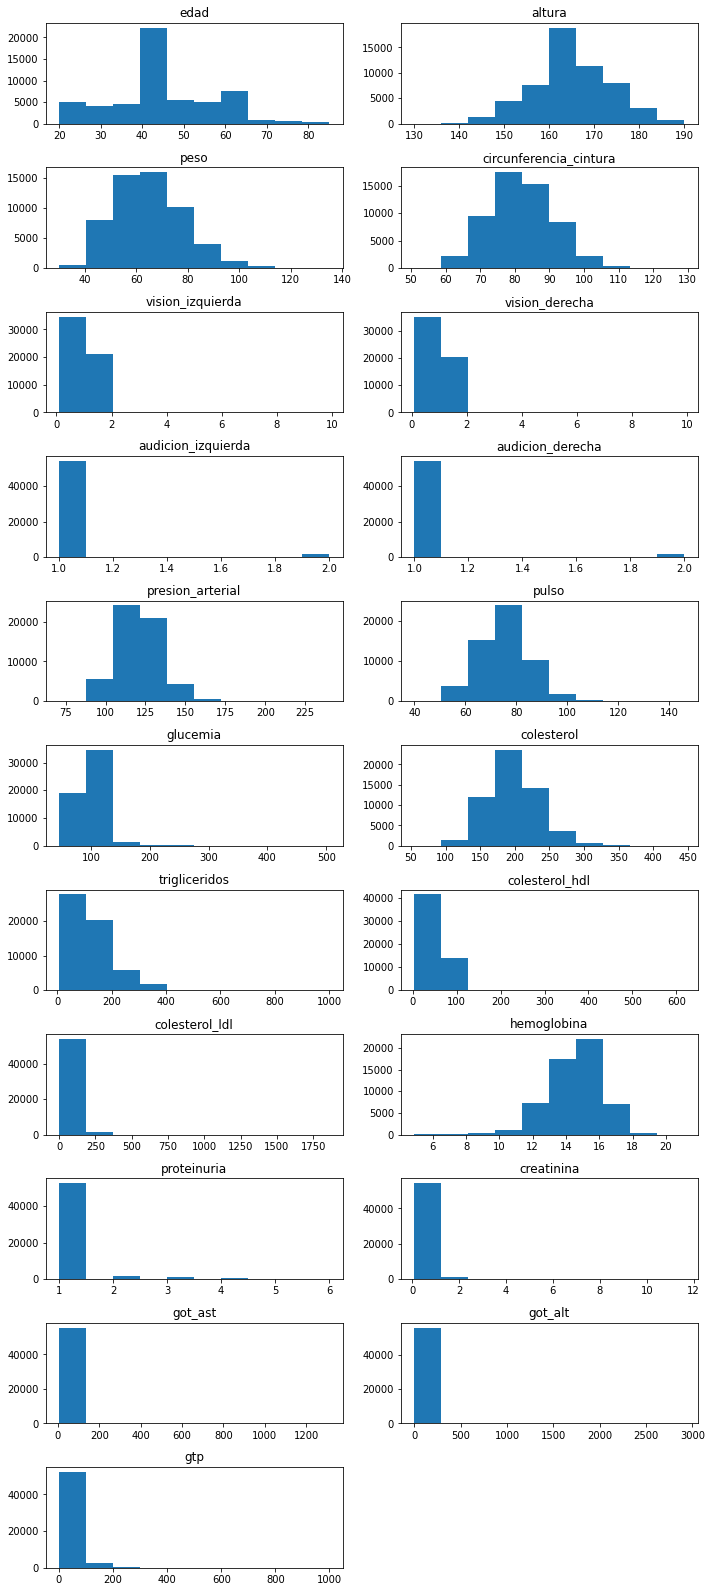

In [ ]:
num_list = [
            'edad',
            'altura',
            'peso',
            'circunferencia_cintura',
            'vision_izquierda',
            'vision_derecha',
            'audicion_izquierda',
            'audicion_derecha',
            'presion_arterial',
            'pulso',
            'glucemia',
            'colesterol',
            'trigliceridos',
            'colesterol_hdl',
            'colesterol_ldl',
            'hemoglobina',
            'proteinuria',
            'creatinina',
            'got_ast',
            'got_alt',
            'gtp'
           ]
           
fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(15,2,i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]])

plt.tight_layout()

# Validamos los valores unicos por cada columna, podemos ver en el histograma que algunas, parecen tener pocos datos.

In [ ]:
df.nunique()

id                        55692
genero                        2
edad                         14
altura                       13
peso                         22
circunferencia_cintura      566
vision_izquierda             19
vision_derecha               17
audicion_izquierda            2
audicion_derecha              2
presion_arterial            130
pulso                        95
glucemia                    276
colesterol                  286
trigliceridos               390
colesterol_hdl              126
colesterol_ldl              289
hemoglobina                 145
proteinuria                   6
creatinina                   38
got_ast                     219
got_alt                     245
gtp                         488
revision_oral                 1
caries                        2
sarro                         2
es_fumador                    2
dtype: int64

# Dropeamos columnas audicion y proetinura, ya que unicamente tenemos dos valores, y el mayoritario es 1. Actualizamos lista de variables.

In [ ]:
df = df.drop(['audicion_izquierda', 'audicion_derecha','proteinuria'], axis = 1)

num_list = [
            'edad',
            'altura',
            'peso',
            'circunferencia_cintura',
            'vision_izquierda',
            'vision_derecha',
            'presion_arterial',
            'pulso',
            'glucemia',
            'colesterol',
            'trigliceridos',
            'colesterol_hdl',
            'colesterol_ldl',
            'hemoglobina',
            'creatinina',
            'got_ast',
            'got_alt',
            'gtp'
           ]

# Calculamos percentil 99.5 y maximo de las columnas, para poder detectar outliers

In [ ]:
for i in range(len(num_list)):
    print(f'Percentil 99.5 : {df[num_list[i]].quantile(0.995)} - Max {df[num_list[i]].quantile(1)}')


Percentil 99.5 : 80.0 - Max 85.0
Percentil 99.5 : 185.0 - Max 190.0
Percentil 99.5 : 105.0 - Max 135.0
Percentil 99.5 : 109.0 - Max 129.0
Percentil 99.5 : 2.0 - Max 9.9
Percentil 99.5 : 2.0 - Max 9.9
Percentil 99.5 : 165.0 - Max 240.0
Percentil 99.5 : 107.0 - Max 146.0
Percentil 99.5 : 223.0 - Max 505.0
Percentil 99.5 : 306.0 - Max 445.0
Percentil 99.5 : 381.0 - Max 999.0
Percentil 99.5 : 106.0 - Max 618.0
Percentil 99.5 : 216.0 - Max 1860.0
Percentil 99.5 : 18.0 - Max 21.1
Percentil 99.5 : 1.4 - Max 11.6
Percentil 99.5 : 103.54499999999825 - Max 1311.0
Percentil 99.5 : 137.0 - Max 2914.0
Percentil 99.5 : 328.0 - Max 999.0


# Eliminamos outliers

In [ ]:
df = df[df['vision_izquierda'] <= 2]
df = df[df['vision_derecha'] <= 2]
df = df[df['trigliceridos'] <= 381]
df = df[df['colesterol_hdl'] <= 106]
df = df[df['colesterol_ldl'] <= 216]
df = df[df['got_ast'] <= 103.54499999999825]
df = df[df['got_alt'] <= 137.0]
df = df[df['gtp'] <= 328]

# Graficamos nuevamente histograma

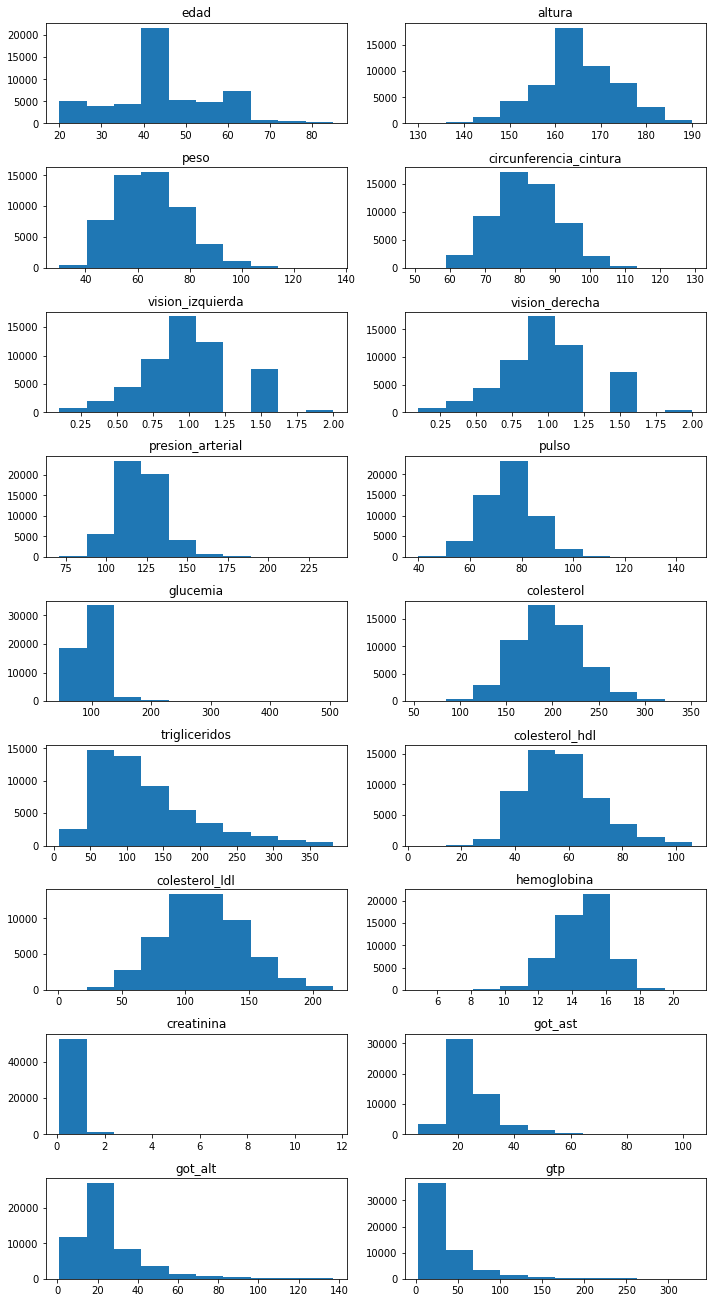

In [ ]:
fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(15,2,i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]])

plt.tight_layout()

# **Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.**


In [ ]:
num_list_df = df[[
            'edad',
            'altura',
            'peso',
            'circunferencia_cintura',
            'vision_izquierda',
            'vision_derecha',
            'presion_arterial',
            'pulso',
            'glucemia',
            'colesterol',
            'trigliceridos',
            'colesterol_hdl',
            'colesterol_ldl',
            'hemoglobina',
            'creatinina',
            'got_ast',
            'got_alt',
            'gtp'
           ]]

# **Univariado**

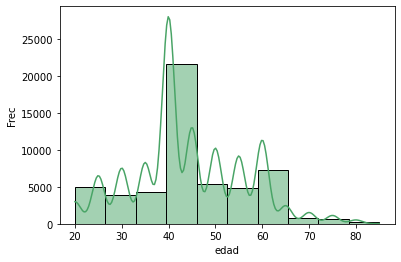

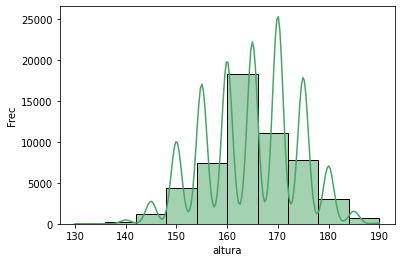

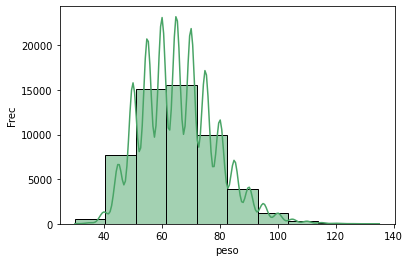

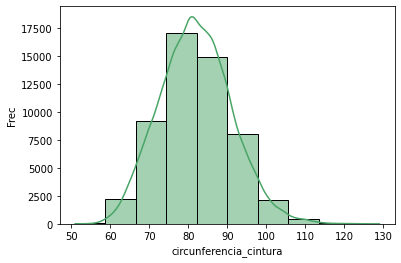

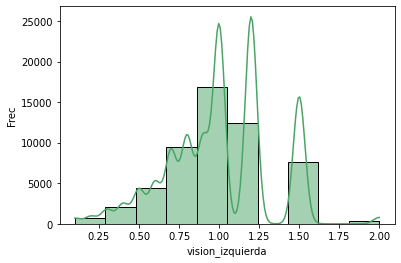

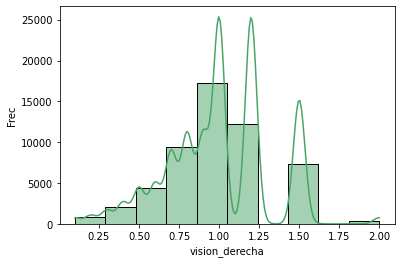

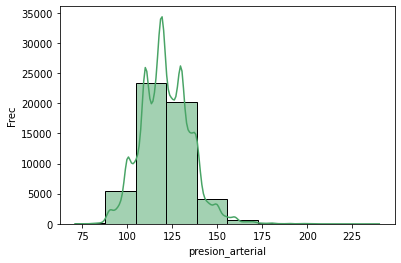

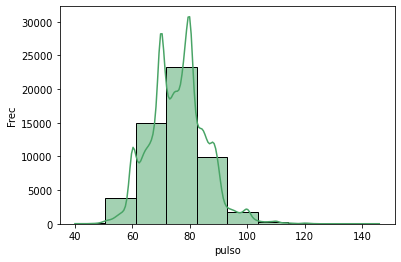

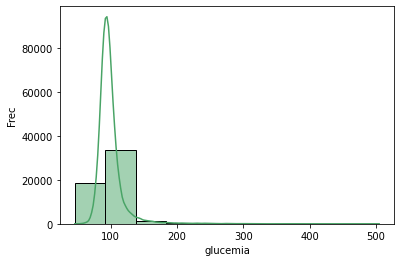

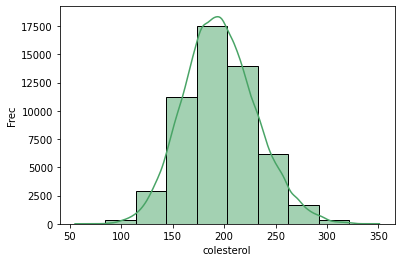

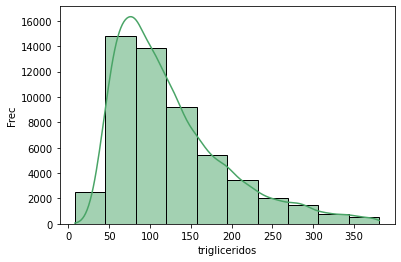

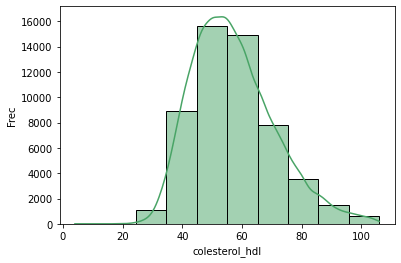

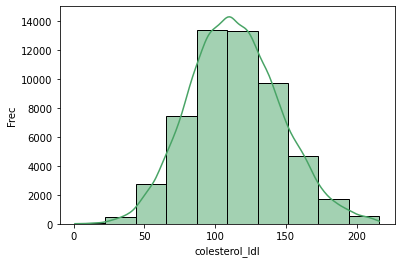

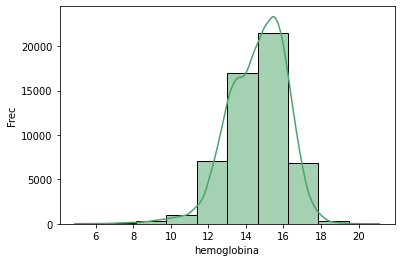

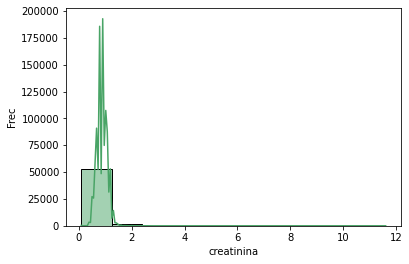

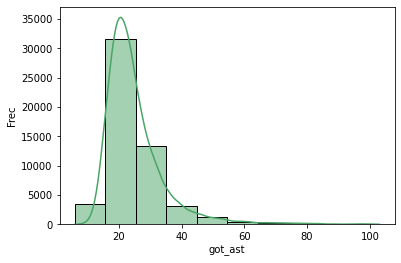

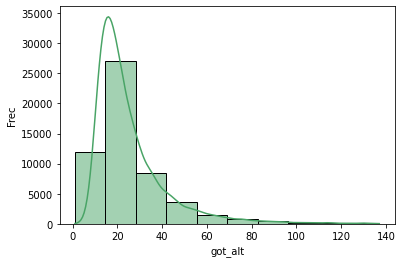

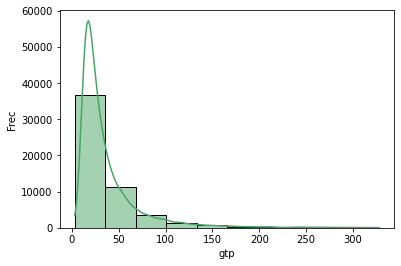

In [ ]:
for i in num_list_df:
    ax = sns.histplot(df[i], bins= 10, kde= True, color='#49a466') 
    ax.set(ylabel='Frec')
    plt.show()


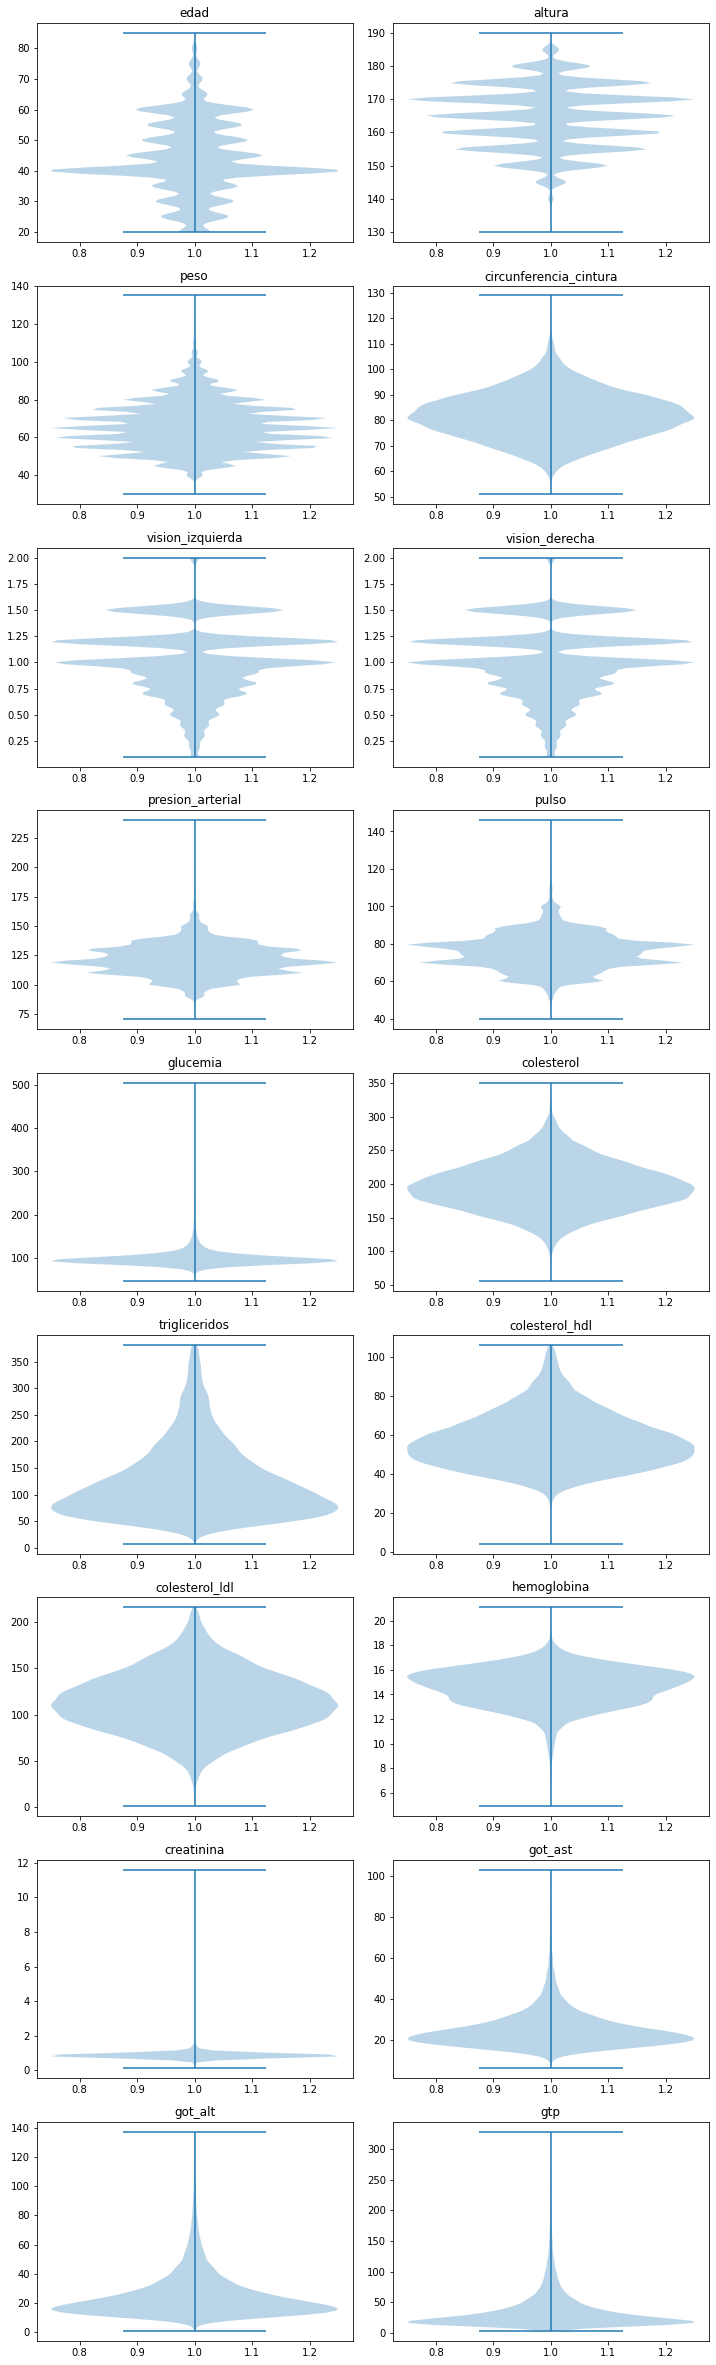

In [ ]:
fig = plt.figure(figsize=(10,40))

for i in range(len(num_list)):
    plt.subplot(11,2,i+1)
    plt.title(num_list[i])
    plt.violinplot(df[num_list[i]])

plt.tight_layout()


# **Bivariado**

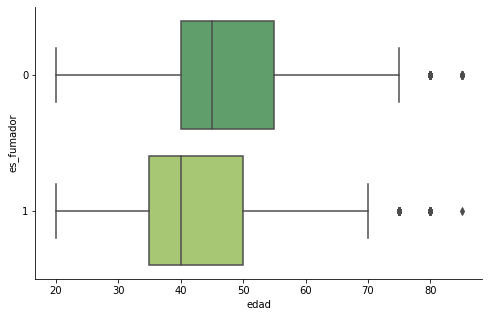

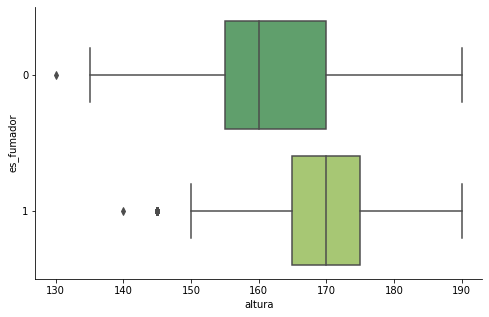

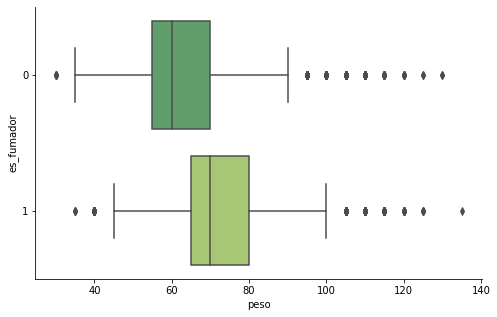

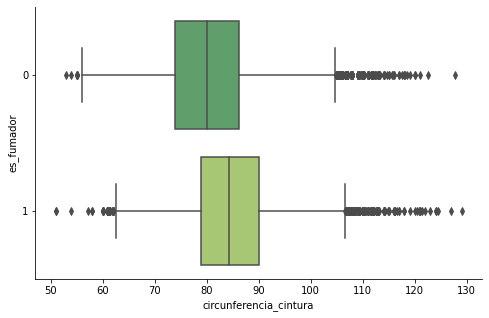

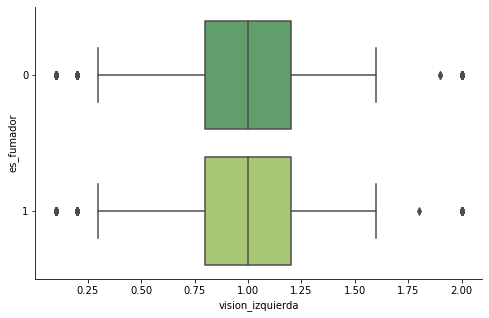

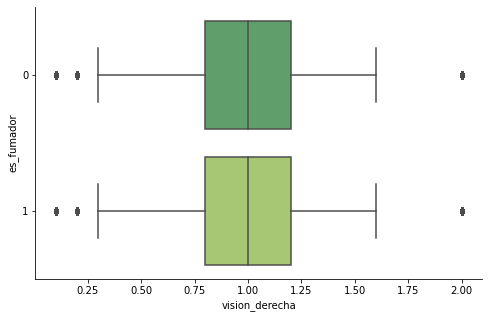

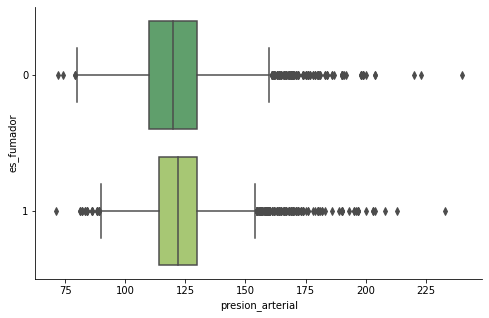

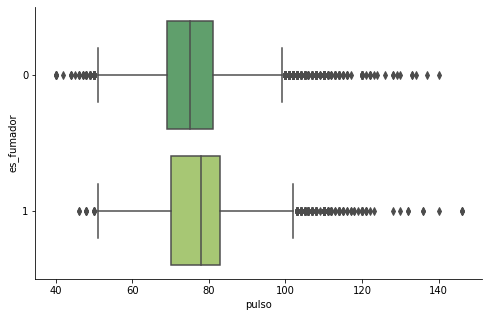

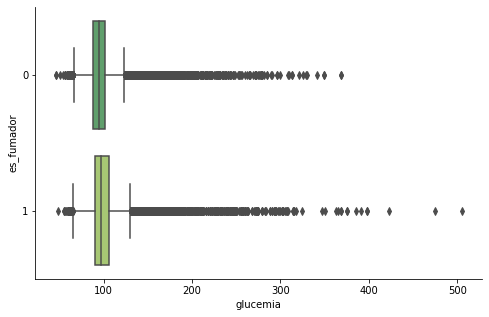

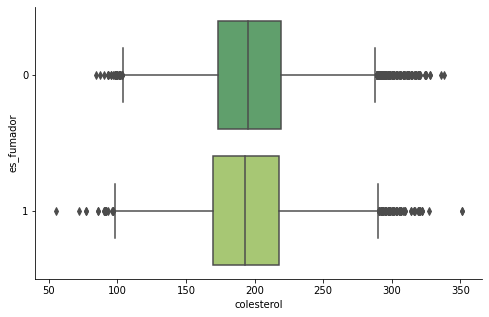

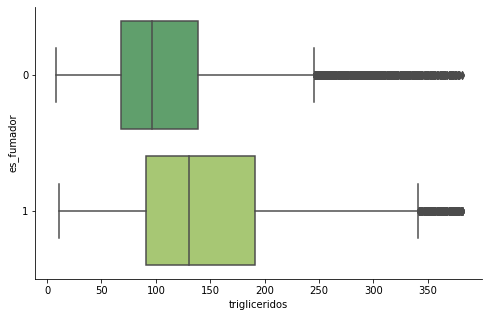

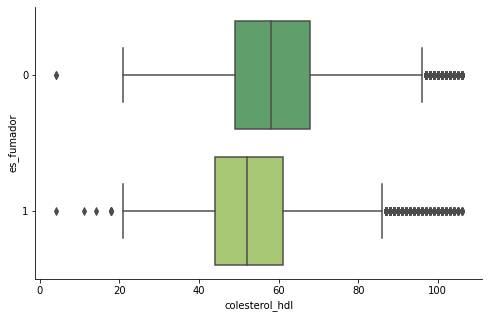

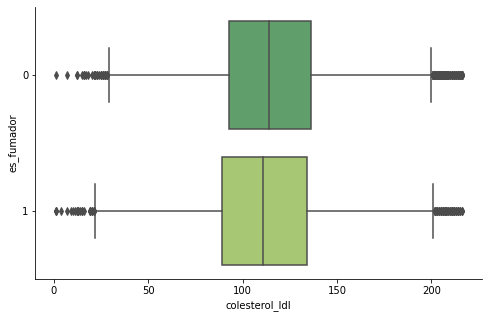

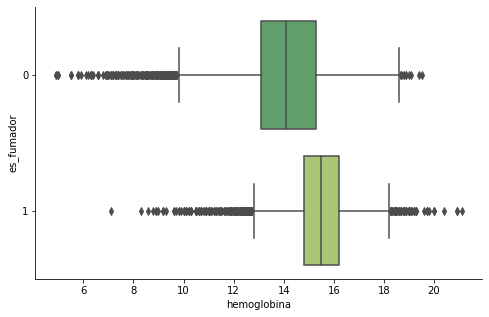

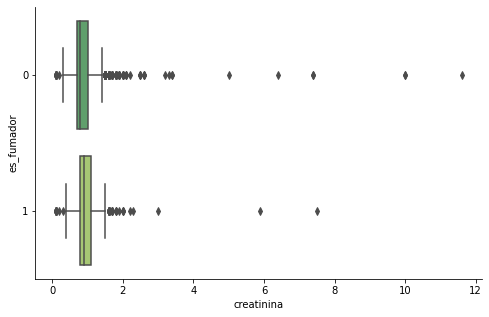

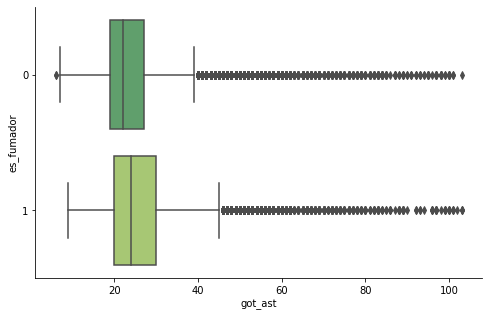

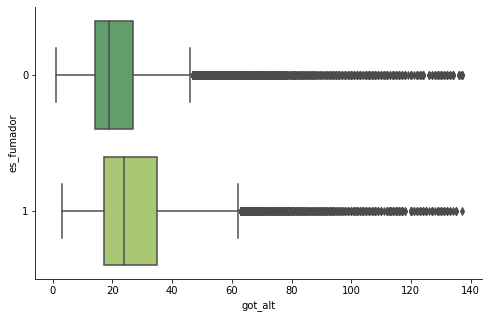

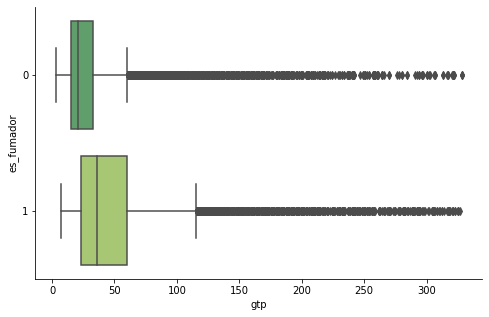

In [ ]:
f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='edad',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='altura',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='peso',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='circunferencia_cintura',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='vision_izquierda',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='vision_derecha',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='presion_arterial',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='pulso',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='glucemia',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='colesterol',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='trigliceridos',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='colesterol_hdl',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='colesterol_ldl',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='hemoglobina',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='creatinina',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='got_ast',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='got_alt',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='gtp',data=df, orient="h", palette="summer")

# **Multivariado**

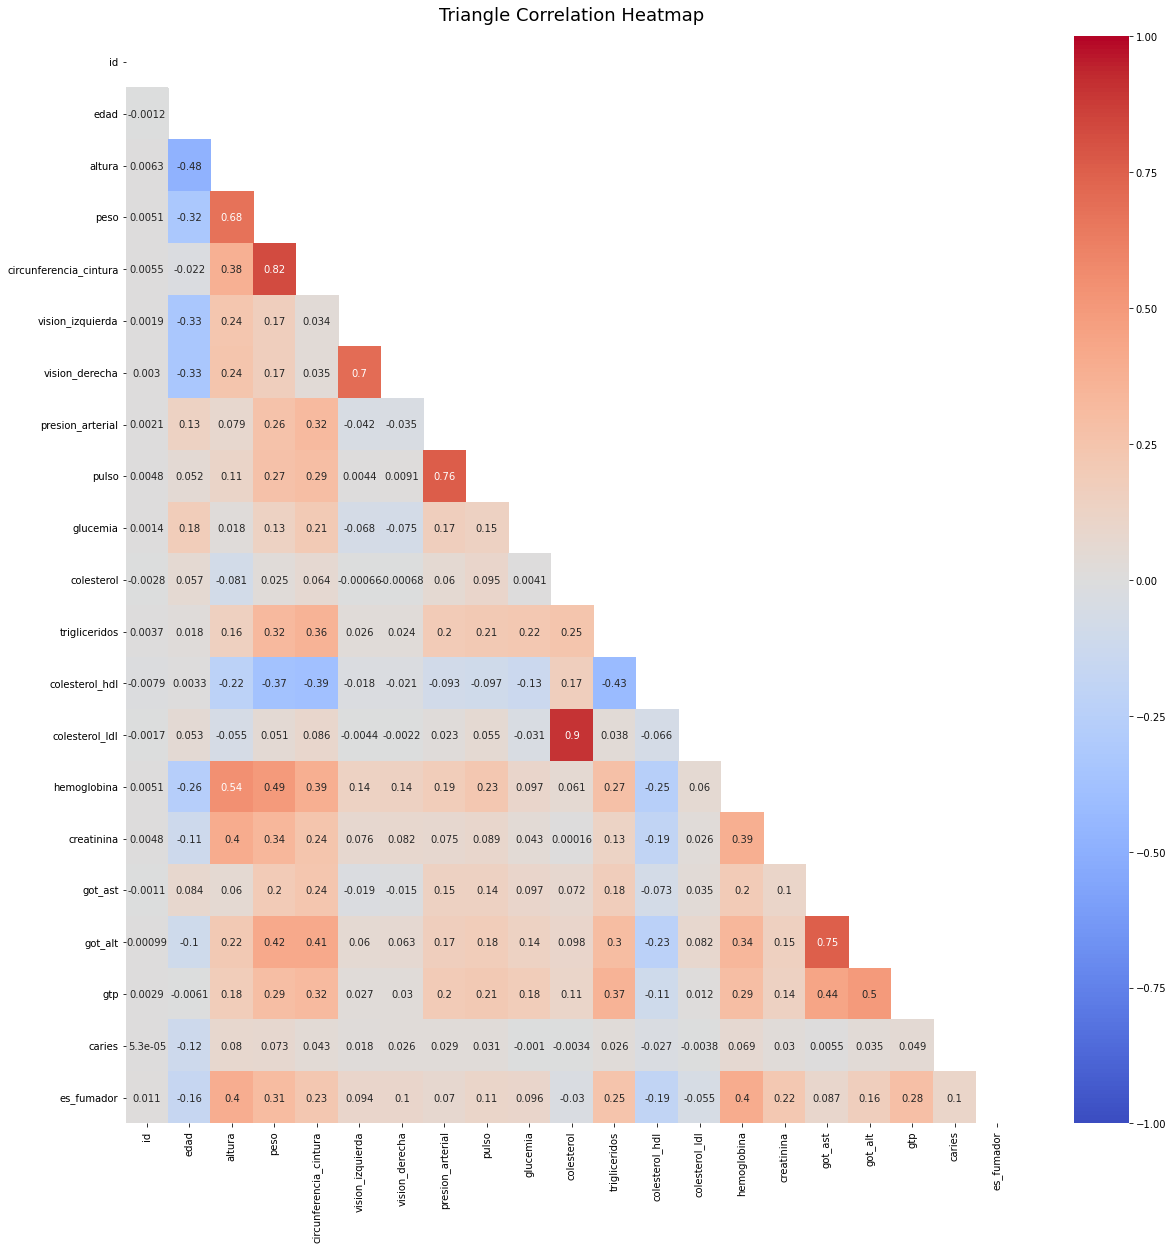

In [ ]:
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2g')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# **PCA**

In [ ]:
#PCA
from sklearn.decomposition import PCA

In [ ]:
x = df.loc[:, num_list_df].values

ValueError: ignored

In [ ]:
y = data.loc[:,['popularity_cat']].values